In [1]:
import matplotlib.pyplot as plt
import numpy as np

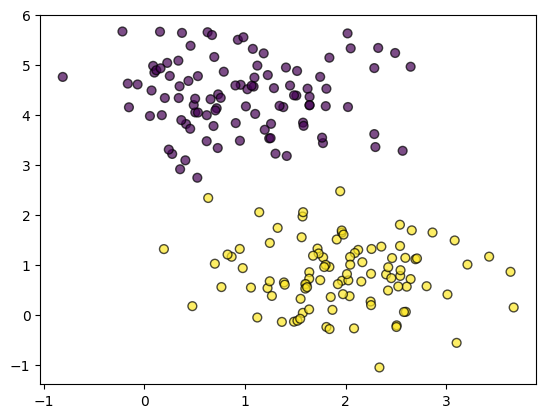

In [2]:
from sklearn.datasets import make_blobs
# creating a dataset with linearly separable data
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=.7, shuffle=True, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, alpha=0.7, edgecolors='black')
plt.show()

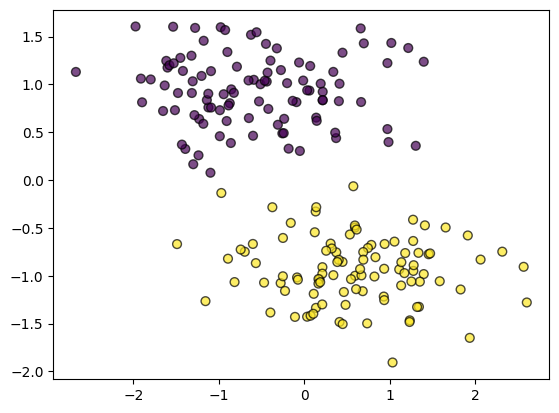

In [ ]:
# standardization --> normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, alpha=0.7, edgecolors='black')
plt.show()

In [ ]:
# original classes
y[:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# 0 to -1 class change for better perceptron computation
y = np.where(y == 0, -1, 1)
y[:10]

array([ 1,  1,  1,  1, -1, -1, -1, -1,  1, -1])

## The perceptron learning rule

The whole idea behind the MCP neuron and Rosenblatt's *thresholded* perceptron model is to use a reductionist approach to mimic how a single neuron in the brain works: it either *fires* or it doesn't. Thus, Rosenblatt's initial perceptron rule is fairly simple and can be summarized by the following steps:

1. Initialize the weights to 0 or small random numbers.
2. For each training sample $x^{(i)}$:

  a) Compute the output value $\hat{y}$.
  $$ \hat{y}(z^{(i)})=\left\{\begin{matrix}
1 \;\mathrm{if} \;z^{(i)} \geqslant 0 \\
-1 \; \mathrm{otherwise}
\end{matrix}\right.$$

  b) Update the weights.

Here, the output value is the class label predicted by the unit step function that we defined earlier, and the simultaneous update of each weight $w_j$ in the weight vector $\mathbf{w}$ can be more formally written as:

$$ w_j:=w_j+\Delta w_j$$

The value of $\Delta w_j$, which is used to update the weight
$w_j$, is calculated by the perceptron learning rule:

$$\Delta w_j=\eta \left ( y^{(i)}-\hat{y}^{(i)} \right ) x_j^{(i)}$$

Where $\eta$ is the **learning rate** (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the
**true class label** of the ith training sample, and $\hat{y}^{(i)}$ is the **predicted class label** and $x_j^{(i)}$ is the training sample.


In [ ]:
# adiciona uma coluna de '1' correspondente ao bias --> weight(0)
X_ones = np.c_[np.ones(X.shape[0]),X]
print('X shape:', X.shape)
print('X_ones shape:', X_ones.shape)
# Initialize the weights to 1
w = np.ones(X_ones.shape[1])
print('initial weights w =', w)
# learning rate
eta = 0.001
# number of iterations (epochs)
n_epochs = 30
# errors vector per epochs
errors_ = []

X shape: (200, 2)
X_ones shape: (200, 3)
initial weights w = [1. 1. 1.]


In [ ]:
idx=5
xi=X_ones[idx]
yi=y[idx]

In [ ]:
xi

array([ 1.        , -1.12045517,  0.76016765])

In [ ]:
yi

-1

In [ ]:
z = np.dot(w, xi)
z

0.6314374464501158

In [ ]:
y_hat = np.where(z >= 0.0, 1, -1)
y_hat

array(1)

In [ ]:
delta_W = eta * (yi - y_hat) * xi
delta_W

array([-0.002     ,  0.00224091, -0.00152034])

In [ ]:
w += delta_W
w

array([0.994     , 1.0030845 , 0.99409928])

In [ ]:
# adiciona uma coluna de '1' correspondente ao bias --> weight(0)
X_ones = np.c_[np.ones(X.shape[0]),X]
print('X shape:', X.shape)
print('X_ones shape:', X_ones.shape)
# Initialize the weights to 1
w = np.ones(X_ones.shape[1])
print('initial weights w =', w)
# learning rate
eta = 0.001
# number of iterations (epochs)
n_epochs = 30
# errors vector per epochs
errors_ = []

for i in range(1, n_epochs+1):
    errors = 0
    for j in range(X_ones.shape[0]):
        xi = X_ones[j]
        yi = y[j]
        # z = net input function = somatório(w.X)
        z = np.dot(w, xi)
        # Compute the prediction output value y (y_hat)
        y_hat = np.where(z >= 0.0, 1, -1)
        # calculate delta weight
        delta_W = eta * (yi - y_hat) * xi
        # Update the weights
        w += delta_W
        # se a previsão (y_hat) != label (y) --> + 1 no erro
        if yi != y_hat:
            errors += 1

    if(i == 1 or i % 10 == 0):
      #print(f'época: {i} pesos: {w}, erros: {errors}')
      print('época:', i, '\tpesos:', w, '\terros:', errors)
    # armazeno a quantidade de erros de cada época
    errors_.append(errors)

# o objetivo é encontrar os pesos (weights) das entradas através do treinamento da rede
print('Os pesos da rede treinada:', w)

X shape: (200, 2)
X_ones shape: (200, 3)
initial weights w = [1. 1. 1.]
época: 1 	pesos: [0.86       1.0728631  0.77503793] 	erros: 114
época: 10 	pesos: [ 0.218       0.86276884 -0.24535833] 	erros: 38
época: 20 	pesos: [ 0.068       0.55277463 -0.55253348] 	erros: 8
época: 30 	pesos: [ 0.034       0.42275237 -0.60854503] 	erros: 5
Os pesos da rede treinada: [ 0.034       0.42275237 -0.60854503]


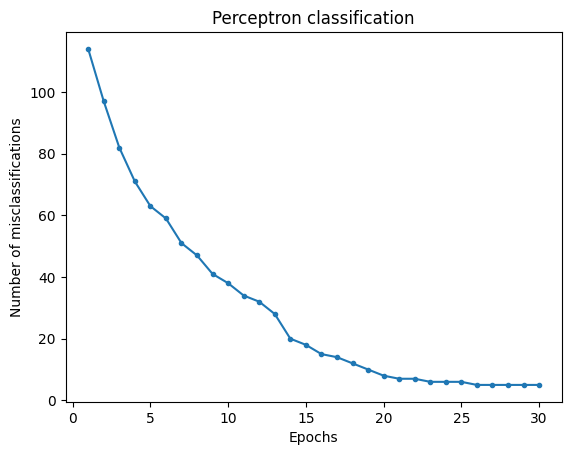

In [ ]:
plt.plot(range(1, len(errors_) + 1), errors_, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron classification')
plt.show()

In [ ]:
def predict(X, w):
  # w --> pesos da rede treinada
  one_=np.array([1])
  # adiciona uma coluna de '1'
  X_1 = np.append(one_, X, axis=0)
  # z = net input function = somatório(w.X)
  z = np.dot(w, X_1)
  # Return class label after unit step
  return np.where(z >= 0.0, 1, -1)

###Prediction
For predictions, simply use the perceptron with the weights already trained and compute the output value y_hat.
<center><img src='https://drive.google.com/uc?id=1idZn-XU0rfw9qpEzPd2sK0VhiVDUg_Ob' width=400></center>

In [ ]:
x_new=np.array([0,-1])
print(x_new, ' Class prediction:', predict(x_new,w))

[ 0 -1]  Class prediction: 1
